In [1]:
import pytesseract
import numpy as np
import cv2
import matplotlib.pyplot as plt

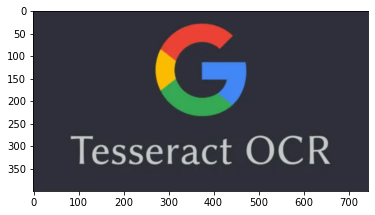

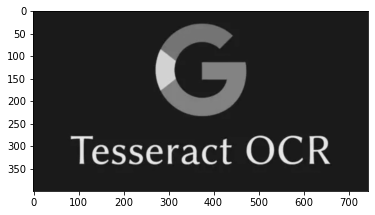

In [2]:
img = cv2.imread('Imagens/Aula1-ocr.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_rgb)
plt.show()
plt.imshow(img_gray, cmap='gray')
plt.show()

In [3]:
texto = pytesseract.image_to_string(img_gray)
print(texto)

C

Tesseract OCR



# Caracteres diferentes

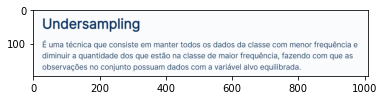

In [4]:
img = cv2.imread('Imagens/Aula2-undersampling.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_rgb)
plt.show()

In [5]:
texto = pytesseract.image_to_string(img_rgb, lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



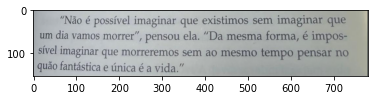

In [6]:
img = cv2.imread('Imagens/Aula2-trecho-livro.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_rgb)
plt.show()

In [7]:
texto = pytesseract.image_to_string(img_rgb, lang='por')
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [8]:
from PIL import Image
import matplotlib.pyplot as plt


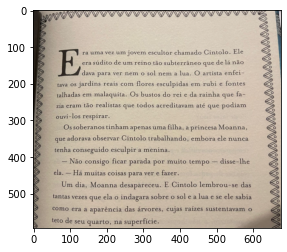

In [9]:
img = Image.open('Imagens/Aula2-livro.png')
plt.imshow(img);

In [10]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



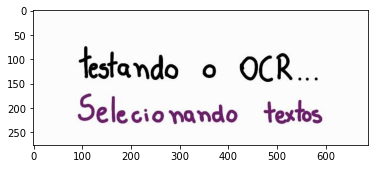

In [11]:
img = cv2.imread('Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

In [12]:
from pytesseract import Output

In [13]:
config_tesseract = "/usr/share/tesseract-ocr/4.00/tessdata/por.traineddata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': [-1, -1, -1, -1, 58, 95, 70, -1, 91, 64],
 'text': ['',
  '',
  '',
  '',
  'testando',
  'o',
  'OCR...',
  '',
  'Selecionando',
  'tests']}

In [14]:
min_conf = 58 #@param {type: "slider", min: 0, max: 100}

In [15]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img


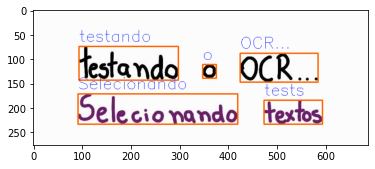

In [16]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca >= min_conf:
        x, y, img = caixa_texto(resultado, img_copia)
        texto = resultado['text'][i]
        cv2.putText(img_copia, texto, (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (22, 36, 255))
        
plt.imshow(img_copia)

In [17]:
caixa_texto(resultado, rgb)


(474,
 184,
 array([[[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        ...,
 
        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [252, 2

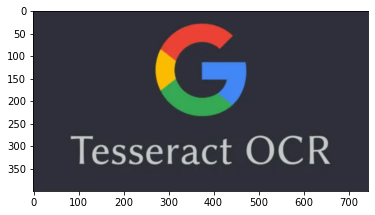

In [18]:
img = cv2.imread('Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

In [19]:
config_tesseract = "/usr/share/tesseract-ocr/4.00/tessdata/por.traineddata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': [-1, -1, -1, -1, 32, -1, -1, -1, 91, 95],
 'text': ['', '', '', '', 'e', '', '', '', 'Tesseract', 'OCR']}

In [20]:
from PIL import ImageFont, ImageDraw, Image

fonte = 'Imagens/calibri.ttf'


In [21]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
    fonte = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - tamanho_texto), texto, font = fonte)
    img = np.array(img_pil)
    
    return img

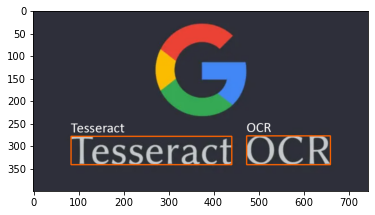

In [22]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca >= min_conf:
        x, y, img = caixa_texto(resultado, img_copia)
        texto = resultado['text'][i]
        img_copia = escreve_texto(texto, x, y, img_copia, fonte)
        
        
plt.imshow(img_copia)

# ----------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
import re

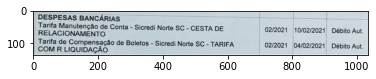

In [24]:
img = cv2.imread('Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

In [25]:
config_tesseract = "/usr/share/tesseract-ocr/4.00/tessdata/por.traineddata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [26]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'


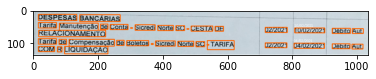

In [30]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

plt.imshow(img_copia);


In [28]:
#salvar imagem
plt.imsave('Imagens/Aula4-tabela_teste_SELECIONADO.png', img_copia)

## Destacando informações

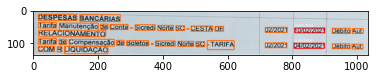

In [32]:
datas = []

img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (255, 8, 9))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

plt.imshow(img_copia);


In [33]:
datas

['10/02/2021', '04/02/2021']

## Cenários naturais

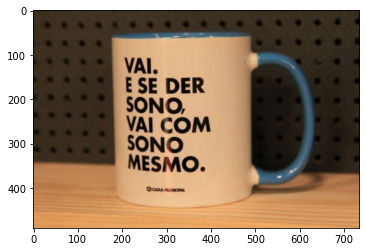

In [41]:
img = cv2.imread('Imagens/Aula4-caneca2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

In [43]:
min_conf = 20

In [45]:
config_tesseract = "/usr/share/tesseract-ocr/4.00/tessdata/por.traineddata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 0, 0, 0, 0],
 'top': [0, 48, 48, 48, 48],
 'width': [735, 735, 735, 735, 735],
 'height': [490, 442, 442, 442, 442],
 'conf': [-1, -1, -1, -1, 95],
 'text': ['', '', '', '', '']}

In [46]:
resultado['conf']

[-1, -1, -1, -1, 95]